In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [2]:
df = pd.read_csv("OLX_cars_dataset00.csv")
df.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett...",['https://images.olx.com.pk/thumbnails/4039460...,https://www.olx.com.pk/item/fresh-import-passo...
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio,['https://images.olx.com.pk/thumbnails/4102504...,https://www.olx.com.pk/item/suzuki-ravi-iid-10...
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers,['https://images.olx.com.pk/thumbnails/4139520...,https://www.olx.com.pk/item/suzuki-bolan-2015-...
3,1076081635,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/3865337...,https://www.olx.com.pk/item/diahatsu-move-2013...
4,1080812928,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio...",['https://images.olx.com.pk/thumbnails/4143509...,https://www.olx.com.pk/item/suzuki-swift-dlx-2...


In [3]:
df.isnull().sum()

Ad ID                  0
Car Name               0
Make                   0
Model                  0
Year                   0
KM's driven            0
Price                  0
Fuel                   0
Registration city      0
Car documents          0
Assembly               0
Transmission           0
Condition              0
Seller Location        0
Description            0
Car Features           0
Images URL's           0
Car Profile          458
dtype: int64

In [4]:
categorical_data = df.select_dtypes(include = ["object", "category"])
for x in categorical_data:
  df[x].fillna(df[x].mode()[0], inplace=True)
df.isnull().sum()
df.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_11744\4005460082.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mode()[0], inplace=True)


,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett...",['https://images.olx.com.pk/thumbnails/4039460...,https://www.olx.com.pk/item/fresh-import-passo...
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio,['https://images.olx.com.pk/thumbnails/4102504...,https://www.olx.com.pk/item/suzuki-ravi-iid-10...
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers,['https://images.olx.com.pk/thumbnails/4139520...,https://www.olx.com.pk/item/suzuki-bolan-2015-...
3,1076081635,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/3865337...,https://www.olx.com.pk/item/diahatsu-move-2013...
4,1080812928,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio...",['https://images.olx.com.pk/thumbnails/4143509...,https://www.olx.com.pk/item/suzuki-swift-dlx-2...


In [18]:
numerical_data = df.select_dtypes(include = ["object", "category"])
for x in numerical_data:
  df[x].fillna(df[x].mean(), inplace=True)
df.isnull().sum()
df.head()

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,6574,10,44,2021,54000,4190000,3,57,1,0,0,0,92,7369,46,1291,2545
1,1080125520,4830,9,47,2018,95000,1300000,3,25,1,1,1,0,1399,5080,3192,2434,6679
2,1080748789,4686,9,4,2015,50000,800000,3,25,1,1,1,0,1614,4993,5970,6285,5946
3,1076081635,1509,2,42,2013,94000,2155000,3,30,1,0,0,0,1904,3970,1247,411,2239
4,1080812928,4482,9,52,2011,126544,1440000,3,25,1,1,1,0,2447,4853,2835,7208,6819


In [19]:
## convert categorical column to numerical columns
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
  df[x]=encoder.fit_transform(df[x])



In [6]:
df.head(15)

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,6574,10,44,2021,54000,4190000,3,57,1,0,0,0,92,7369,46,1291,2545
1,1080125520,4830,9,47,2018,95000,1300000,3,25,1,1,1,0,1399,5080,3192,2434,6679
2,1080748789,4686,9,4,2015,50000,800000,3,25,1,1,1,0,1614,4993,5970,6285,5946
3,1076081635,1509,2,42,2013,94000,2155000,3,30,1,0,0,0,1904,3970,1247,411,2239
4,1080812928,4482,9,52,2011,126544,1440000,3,25,1,1,1,0,2447,4853,2835,7208,6819
5,1079496823,5808,9,55,2020,54000,2830000,3,30,1,1,0,0,39,8716,2200,1695,8378
6,1080333426,1269,2,41,2013,140000,2150000,3,25,1,0,0,0,1963,6195,334,3222,2065
7,1080784758,4125,9,4,2016,32000,1050000,3,25,1,1,1,0,1513,4328,5458,6770,5957
8,1076448625,92,4,8,2004,160000,1230000,3,51,1,1,1,0,195,711,2873,461,120
9,1080820574,6068,9,23,2008,75000,950000,3,15,1,1,1,0,143,964,4072,7329,773


In [20]:
df.shape

(9179, 18)

In [21]:
X = df.drop(["Price"], axis=1)
y = df["Price"]

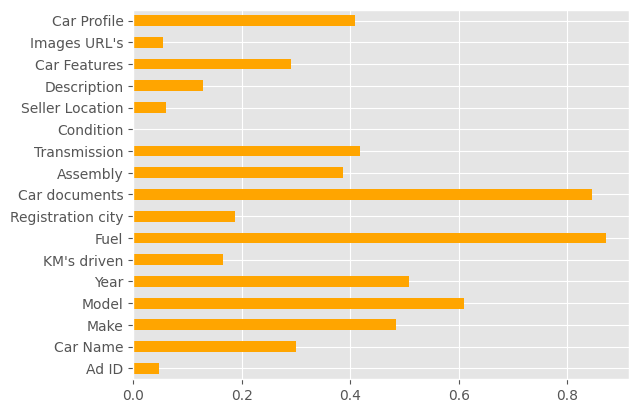

In [22]:
from sklearn.feature_selection import mutual_info_classif
plt.style.use("ggplot")
importance = mutual_info_classif(X,y)
feature_impo = pd.Series(importance,X.columns[0:len(X.columns)])
feature_impo.plot(kind="barh", color="orange")
plt.show()

In [23]:
X = df.drop(["Condition"], axis=1)

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.20, random_state=1)

In [27]:
from sklearn.pipeline import Pipeline
LinearModel = Pipeline([("scalar", StandardScaler()),("Regression",LinearRegression())])
LinearModel.fit(xtrain, ytrain)


Pipeline(steps=[('scalar', StandardScaler()),
                ('Regression', LinearRegression())])

In [28]:
pred1 = LinearModel.predict(xtest)
pred1

array([2000000.        , 3480000.00000001, 2570000.        , ...,
       1250000.        ,  750000.        ,  925000.        ])

In [29]:
print("MAE",mean_absolute_error(ytest,pred1))
print("Mape",mean_absolute_percentage_error(ytest,pred1))
print("mse",mean_squared_error(ytest,pred1))
print("R2 score", r2_score(ytest,pred1))

MAE 2.1613557054001783e-09
Mape 1.4924701336881785e-15
mse 7.568931404098917e-18
R2 score 1.0


In [31]:
outcome ={
  "Actual Price": ytest,
  "predicted price": pred1
}

df1 = pd.DataFrame(outcome)
df1

,Actual Price,predicted price
5954,2000000,2000000.0
2403,3480000,3480000.0
552,2570000,2570000.0
4950,2750000,2750000.0
481,4300000,4300000.0
...,...,...
4604,4500000,4500000.0
7977,3200000,3200000.0
9009,1250000,1250000.0
4865,750000,750000.0
